# **Bike Sharing Assignment** 
-------
**By: Manikanta Vedula**

## Problem Statement

- Bike Sharing Company have contracted with a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    - Which variables are significant in predicting the demand for shared bikes.
    
    - How well those variables describe the bike demands.

## Business Goal
   
- You are required to model the demand for shared bikes with the available independent variables. 

- It will be used by the management to understand how exactly the demands vary with different features. 

- They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 

- Further, the model will be a good way for management to understand the demand dynamics of a new market.
   

      

In [5]:
#importing required libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
import calendar

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

from scipy import stats


In [6]:
#to ignore warnings, if any.
import warnings
warnings.filterwarnings('ignore')

In [7]:
#set plot style
def customPlot():
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [8]:
#using pandas for reading data from csv file
bdata = pd.read_csv('day.csv')

In [9]:
#shape of data (730 rows and 16 columns)
bdata.shape

(730, 16)

In [10]:
#bike sharing data info
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
#supressing the float format to 2 decimal points globally
pd.options.display.float_format = '{:.2f}'.format

In [12]:
#creating a copy of actual data
bdata1 = bdata.iloc[:]

# **Data Cleaning**
## - Null Values
- **No Null values**

In [13]:
#list of null values
bdata1.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## - Unique Values
- **Unique values seems good**

In [14]:
#list of unique values
bdata1.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## - Pair Plot

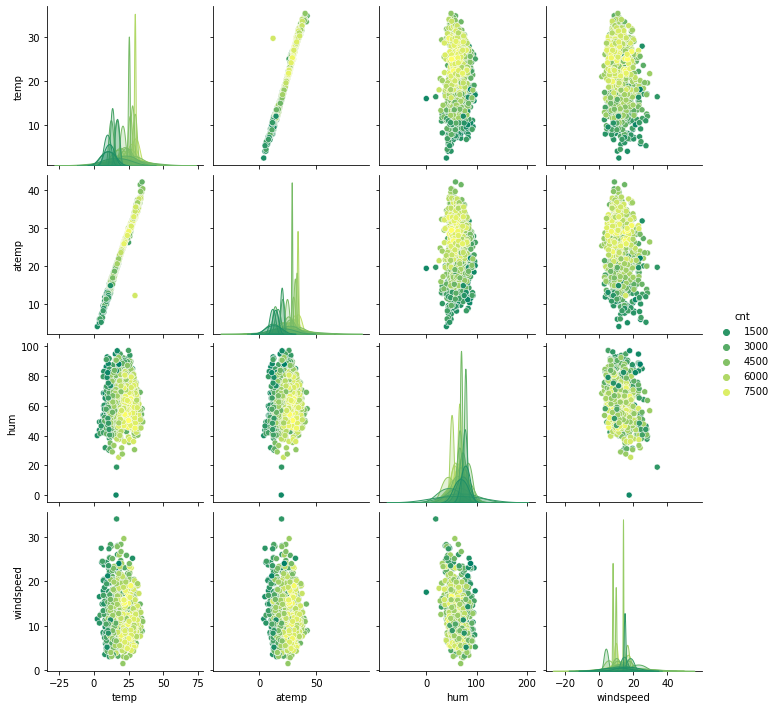

In [15]:
sns.pairplot(bdata1, vars=['temp', 'atemp', 'hum', 'windspeed'], hue='cnt', palette='summer')
plt.show()

## - Correlation

In [16]:
# common function for correlation

def correlation(data):
    customPlot() #plot theme

    plt.figure(figsize=(15, 8)) #plot figure size
    sns.set(font_scale=1.02) #plot font size

    bc = data.corr() #correlation values for the bike sharing data
    ax = sns.heatmap(bc, cmap="summer_r", annot=True) #plotting a heatmap

    cbar = ax.collections[0].colorbar #color bar
    cbar.ax.tick_params(color='w', labelcolor='w') #color bar customization

    #labels
    for tick in [ax.axes.get_xticklabels(), ax.axes.get_yticklabels()]:
        for label in tick:
            label.set_color("white")
            label.set_fontsize("12")
    plt.show() #to show plot

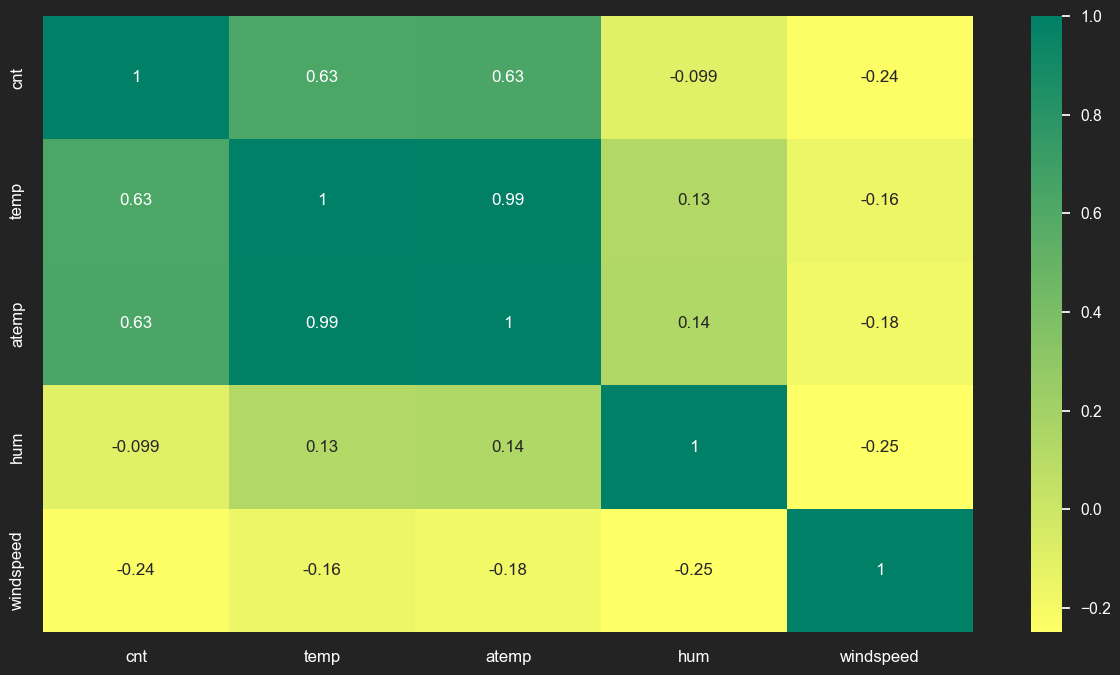

In [17]:
correlation(bdata1[['cnt', 'temp', 'atemp', 'hum', 'windspeed']]) #correlation for all variables

## - Fix Columns

- **Exploring First 8 Columns**

In [18]:
#exploring first 8 columns
bdata1.iloc[:7, :8]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday
0,1,01-01-2018,1,0,1,0,6,0
1,2,02-01-2018,1,0,1,0,0,0
2,3,03-01-2018,1,0,1,0,1,1
3,4,04-01-2018,1,0,1,0,2,1
4,5,05-01-2018,1,0,1,0,3,1
5,6,06-01-2018,1,0,1,0,4,1
6,7,07-01-2018,1,0,1,0,5,1


- **Drop <code>instant</code> column as this is used just for numbering**

In [19]:
#dropping unnecessary columns
bdata1.drop(['instant'], 1, inplace=True)

#shape after dropping instant column (730 rows, 15 columns)
bdata1.shape

(730, 15)

- **Drop <code>dteday</code>, As we already have <code>yr</code> column and <code>mnth</code> column**

In [20]:
#dropping unnecessary columns
bdata1.drop(['dteday'], 1, inplace=True)

#shape after dropping dteday column (730 rows, 14 columns)
bdata1.shape

(730, 14)

- **Exploring next 8 columns**

In [21]:
#exploring next 8 columns
bdata1.iloc[:7, 5:]

,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,2,14.11,18.18,80.58,10.75,331,654,985
1,0,2,14.90,17.69,69.61,16.65,131,670,801
2,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,1,1,9.31,11.46,43.70,12.52,82,1518,1600
5,1,1,8.38,11.66,51.83,6.00,88,1518,1606
6,1,2,8.06,10.44,49.87,11.30,148,1362,1510


# **Univariate Analysis**

- **Drop <code>temp</code> column as <code>atemp</code> represents the same**

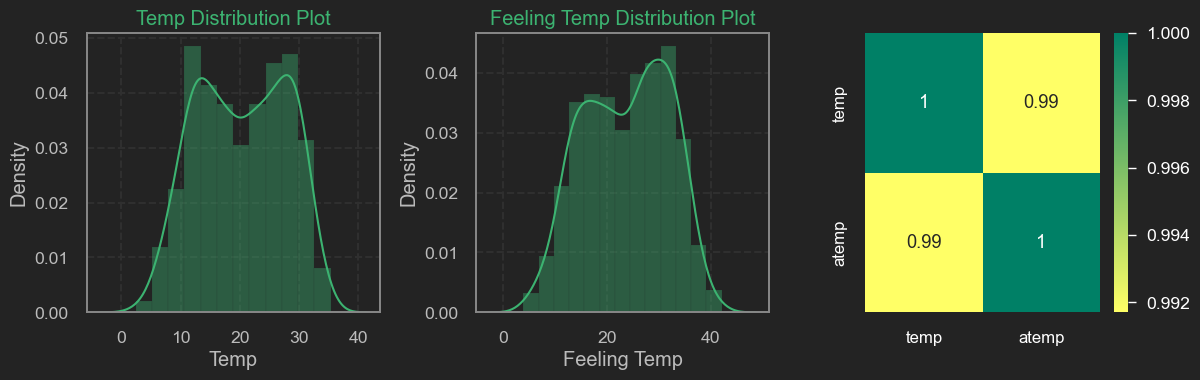

In [22]:
#plot style
customPlot()

columns = ['temp', 'atemp'] #columns for subplot
labels = ['Temp', 'Feeling Temp'] #labels for subplot

fig, axes = plt.subplots(1, 3, figsize=(12, 4)) #initializing a subplot

for i, v in enumerate(columns):
    sns.distplot(ax=axes[i], x=bdata1[v], color='mediumseagreen') #plotting distribution plot
    axes[i].set_xlabel(labels[i]) #xlabel
    axes[i].set_title(labels[i]+' Distribution Plot', color='mediumseagreen') #title
    axes[i].grid(linestyle='--') #plot grid customization
        
    fig = axes[i].get_figure() #plot figure
    fig.tight_layout() #to avoid overlap

ax = sns.heatmap(bdata1[columns].corr(), annot=True, cmap='summer_r', ax=axes[2])

cbar = ax.collections[0].colorbar #color bar
cbar.ax.tick_params(color='w', labelcolor='w') #color bar customization

#creating labels
for tick in [ax.axes.get_xticklabels(), ax.axes.get_yticklabels()]:
    for label in tick:
        label.set_color("white")
        label.set_fontsize("12")

plt.show() #to show the plot

**Observation:**
In the above plot,
- <code>Distribution Plots Overview:</code> 
    - The distribution for the two columns looks the same.
    - In the 3rd plot, <code>temp</code> and <code>atemp</code> are highly correlated.

In [23]:
def scatterPlot(columns, cnt, labels, fig, axes):
    customPlot() #plot style

    for i, v in enumerate(columns):
        sns.scatterplot(ax=axes[i], x=bdata1[v], y=bdata1[cnt], color='mediumseagreen')
        axes[i].set_xlabel(labels[i]) #xlabel
        axes[i].set_ylabel('Count') #xlabel
        axes[i].set_title(labels[i]+' Scatter Plot', color='mediumseagreen') #title
        axes[i].grid(linestyle='--') #plot grid customization
            
        fig = axes[i].get_figure() #plot figure
        fig.tight_layout() #to avoid overlap

plt.show()

# **Univariate Analysis**

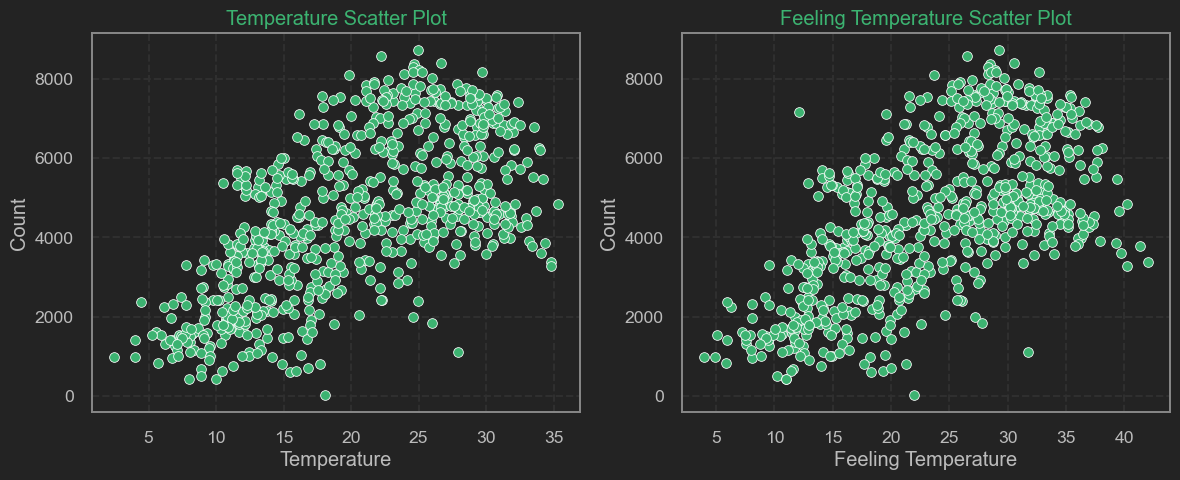

In [24]:
columns = ['temp', 'atemp'] #columns for subplot
labels = ['Temperature', 'Feeling Temperature'] #labels for subplot

fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #initializing a subplot
scatterPlot(columns, 'cnt', labels, fig, axes) #scatter plot

**Observation:**
In the above plot,
- <code>Scatter Plots Overview:</code> 
    - The Count is slightly higher at Feeling Temperatures.
    - Hence, dropping <code>temp</code> column and considering feeling temperature ie., <code>atemp</code>.

In [25]:
#dropping highly correlated columns
bdata1.drop(['temp'], 1, inplace=True)

#shape after dropping temp column (730 rows, 13 columns)
bdata1.shape

(730, 13)

- **Dropping <code>casual</code> and <code>registered</code> columns**
- **As <code>cnt</code> column which is a target variable already represents the sum of both columns**

In [26]:
#dropping unnecessary columns
bdata1.drop(['casual', 'registered'], 1, inplace=True)

#shape after dropping casual and registered columns (730 rows, 11 columns)
bdata1.shape

(730, 11)

In [27]:
#column data types
bdata1.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

## - Outlier Treatment

In [28]:
#describing data
bdata1.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,2.50,0.50,6.53,0.03,3.00,0.68,1.39,23.73,62.77,12.76,4508.01
std,1.11,0.50,3.45,0.17,2.01,0.47,0.54,8.15,14.24,5.20,1936.01
min,1.00,0.00,1.00,0.00,0.00,0.00,1.00,3.95,0.00,1.50,22.00
25%,2.00,0.00,4.00,0.00,1.00,0.00,1.00,16.89,52.00,9.04,3169.75
50%,3.00,0.50,7.00,0.00,3.00,1.00,1.00,24.37,62.62,12.13,4548.50
75%,3.00,1.00,10.00,0.00,5.00,1.00,2.00,30.45,72.99,15.63,5966.00
max,4.00,1.00,12.00,1.00,6.00,1.00,3.00,42.04,97.25,34.00,8714.00


# **Univariate Analysis**

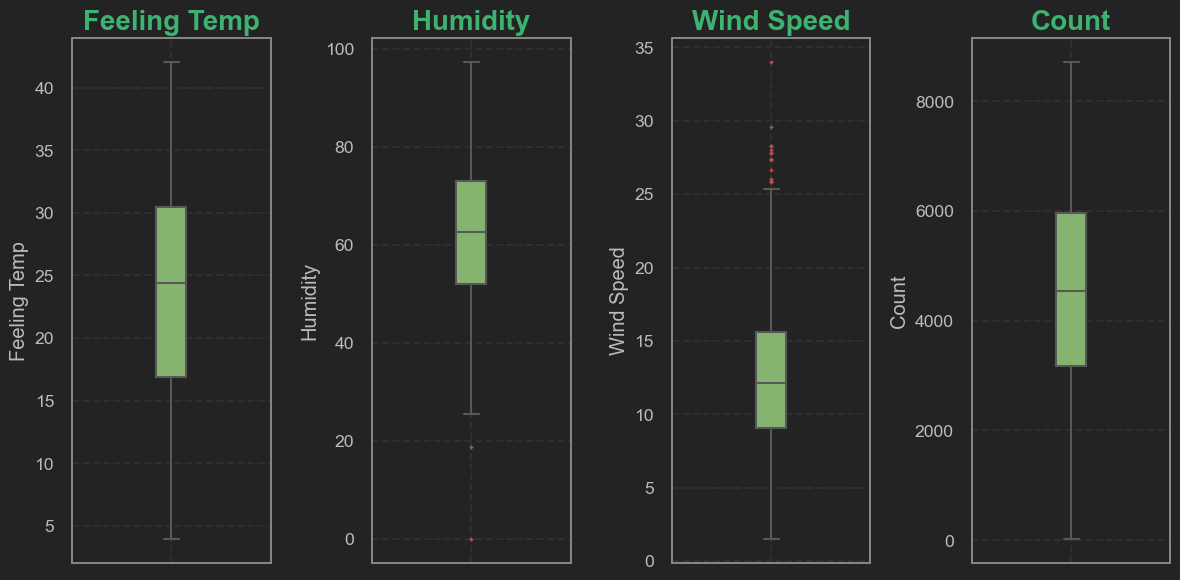

In [29]:
#plot style
customPlot()

columns = ['atemp', 'hum', 'windspeed', 'cnt'] #subplot columns
labels = ['Feeling Temp', 'Humidity', 'Wind Speed', 'Count'] #subplot labels

fig, axes = plt.subplots(1, 4, figsize=(12, 6)) #initilising a subplot

#outlier icon customization
flierprops = dict(marker='+', markerfacecolor='gray', markersize=3, linestyle='none', markeredgecolor='r') 

for i, v in enumerate(columns):
    sns.boxplot(ax=axes[i], y=bdata1[v], width=0.15, palette='summer', flierprops=flierprops) #plotting a boxplot
    
    axes[i].set_ylabel(labels[i]) #ylabel
    axes[i].set_title(labels[i], color='mediumseagreen', fontdict={'size': 20, 'weight': 'bold'}) #title
    axes[i].grid(linestyle='--') #plot grid line customization
        
    fig = axes[i].get_figure() #subplot figure
    fig.tight_layout() #to avoid overlap between subplots

    for j,box in enumerate(axes[i].artists):
        box.set_edgecolor('r') #boxplot edge color
        for k in range(6*j,6*(j+1)):
         axes[i].lines[k].set_color('r') #boxplot line color

**Observation:**
In the above plot,
- **From the above Box Plots for continuous variables, we can conclude that there are No Outliers**


## - **Creating Categorical Variables**

- **Renaming <code>yr</code> and <code>mnth</code> columns**

In [30]:
#renaming yr and mnth columns to year and month
bdata1 = bdata1.rename(columns={
    'yr': 'year', 
    'mnth': 'month'
})

#exploring data
bdata1.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,11.46,43.70,12.52,1600


- **Renaming <code>hum</code> and <code>cnt</code> columns**

In [31]:
#renaming hum and cnt columns to humidity and count
bdata1 = bdata1.rename(columns={
    'hum': 'humidity', 
    'cnt': 'count'
})

#exploring data
bdata1.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,11.46,43.70,12.52,1600


In [32]:
#season column values
bdata1.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

- **Mapping Categorical data to <code>season</code> column**

In [33]:
#converting season column to categorical variable
bdata1.season = bdata1.season.map({
    1:'spring', 
    2:'summer', 
    3:'fall', 
    4:'winter'
})

bdata1.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,spring,0,1,0,6,0,2,18.18,80.58,10.75,985
1,spring,0,1,0,0,0,2,17.69,69.61,16.65,801
2,spring,0,1,0,1,1,1,9.47,43.73,16.64,1349
3,spring,0,1,0,2,1,1,10.61,59.04,10.74,1562
4,spring,0,1,0,3,1,1,11.46,43.70,12.52,1600


In [34]:
#year column values
bdata1.year.value_counts()

0    365
1    365
Name: year, dtype: int64

- **Mapping 2018 and 2019 to 0 and 1 respectively to <code>year</code> column**

In [35]:
#mapping year column with respective years
bdata1.year = bdata1.year.map({
    0: 2018, 
    1: 2019
})

#exploring data
bdata1.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,spring,2018,1,0,6,0,2,18.18,80.58,10.75,985
1,spring,2018,1,0,0,0,2,17.69,69.61,16.65,801
2,spring,2018,1,0,1,1,1,9.47,43.73,16.64,1349
3,spring,2018,1,0,2,1,1,10.61,59.04,10.74,1562
4,spring,2018,1,0,3,1,1,11.46,43.70,12.52,1600


In [36]:
#month column values
bdata1.month.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64

- **Mapping respective month names to <code>month</code> column**

In [37]:
#mapping month column with respective months
bdata1.month = bdata1.month.map({
    1:'jan', 2:'feb', 3:'mar', 
    4:'apr', 5:'may', 6:'june',
    7:'july', 8:'aug', 9:'sept', 
    10:'oct', 11:'nov', 12:'dec'
})

bdata1.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,spring,2018,jan,0,6,0,2,18.18,80.58,10.75,985
1,spring,2018,jan,0,0,0,2,17.69,69.61,16.65,801
2,spring,2018,jan,0,1,1,1,9.47,43.73,16.64,1349
3,spring,2018,jan,0,2,1,1,10.61,59.04,10.74,1562
4,spring,2018,jan,0,3,1,1,11.46,43.70,12.52,1600


In [38]:
#weekday column values
bdata1.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

- **Checking day of the week**

In [39]:
#1st record's date is 01-01-2018. Let's see day of the week.
given_date = '01-01-2018'
print(given_date, "is", calendar.day_name[pd.Timestamp(given_date).weekday()])


01-01-2018 is Monday


- **So, from the data given, in <code>weekday</code> column <code>6</code> represents <code>Monday</code>**
- **So, <code>0</code> represents <code>Tuesday</code>**
- **Monday and Tuesday are holidays**

In [40]:
#mapping weekday column with respective day values
bdata1.weekday = bdata1.weekday.map({
    6:'monday', 
    0:'tuesday', 
    1:'wednesday', 
    2:'thursday', 
    3:'friday', 
    4:'saturday', 
    5:'sunday'
})

bdata1.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,spring,2018,jan,0,monday,0,2,18.18,80.58,10.75,985
1,spring,2018,jan,0,tuesday,0,2,17.69,69.61,16.65,801
2,spring,2018,jan,0,wednesday,1,1,9.47,43.73,16.64,1349
3,spring,2018,jan,0,thursday,1,1,10.61,59.04,10.74,1562
4,spring,2018,jan,0,friday,1,1,11.46,43.70,12.52,1600


In [41]:
#workingday column values
bdata1.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

- **If day is neither weekend nor holiday is 1, otherwise is 0**

In [42]:
#mapping workingday column with respective values
bdata1.workingday = bdata1.workingday.map({
    0: 'holiday', 
    1: 'working_day'
})

bdata1.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,spring,2018,jan,0,monday,holiday,2,18.18,80.58,10.75,985
1,spring,2018,jan,0,tuesday,holiday,2,17.69,69.61,16.65,801
2,spring,2018,jan,0,wednesday,working_day,1,9.47,43.73,16.64,1349
3,spring,2018,jan,0,thursday,working_day,1,10.61,59.04,10.74,1562
4,spring,2018,jan,0,friday,working_day,1,11.46,43.70,12.52,1600


In [43]:
#weathersit column values
bdata1.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

- **Mapping Categorical data to <code>weathersit</code> column**

In [44]:
#mapping weathersit column with respective values
bdata1.weathersit = bdata1.weathersit.map({
    1: 'clear',
    2: 'mist',
    3: 'light_snow',
    4: 'heavy_rain'
})

bdata1.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,spring,2018,jan,0,monday,holiday,mist,18.18,80.58,10.75,985
1,spring,2018,jan,0,tuesday,holiday,mist,17.69,69.61,16.65,801
2,spring,2018,jan,0,wednesday,working_day,clear,9.47,43.73,16.64,1349
3,spring,2018,jan,0,thursday,working_day,clear,10.61,59.04,10.74,1562
4,spring,2018,jan,0,friday,working_day,clear,11.46,43.70,12.52,1600


# **Derived Metrics** 
- **Binning the continuous variables for EDA**

In [45]:
#creating a new column for atemp and categorising into buckets
slices = [0, 6, 12, 18, 24, 30, 36, 42]
labels=['0-6.0', '6.0-12.0', '12.0-18.0', '18.0-24.0', '24.0-30.0', '30.0-36.0', '36+']
bdata1['atemp_buckets'] = pd.cut(bdata1['atemp'], slices, labels=labels)

In [46]:
#creating a new column for humidity and categorising into buckets
slices = [0, 20, 40, 60, 80, 100]
labels=['0-20.0', '20.0-40.0', '40.0-60.0', '60.0-80.0', '80.0+']
bdata1['humidity_buckets'] = pd.cut(bdata1['humidity'], slices, labels=labels)

In [47]:
#creating a new column for windspeed and categorising into buckets
slices = [0, 6, 12, 18, 24, 30, 36]
labels=['0-6.0', '6.0-12.0', '12.0-18.0', '18.0-24.0', '24.0-30.0', '30.0+']
bdata1['windspeed_buckets'] = pd.cut(bdata1['windspeed'], slices, labels=labels)

## **Correlation Matrix**

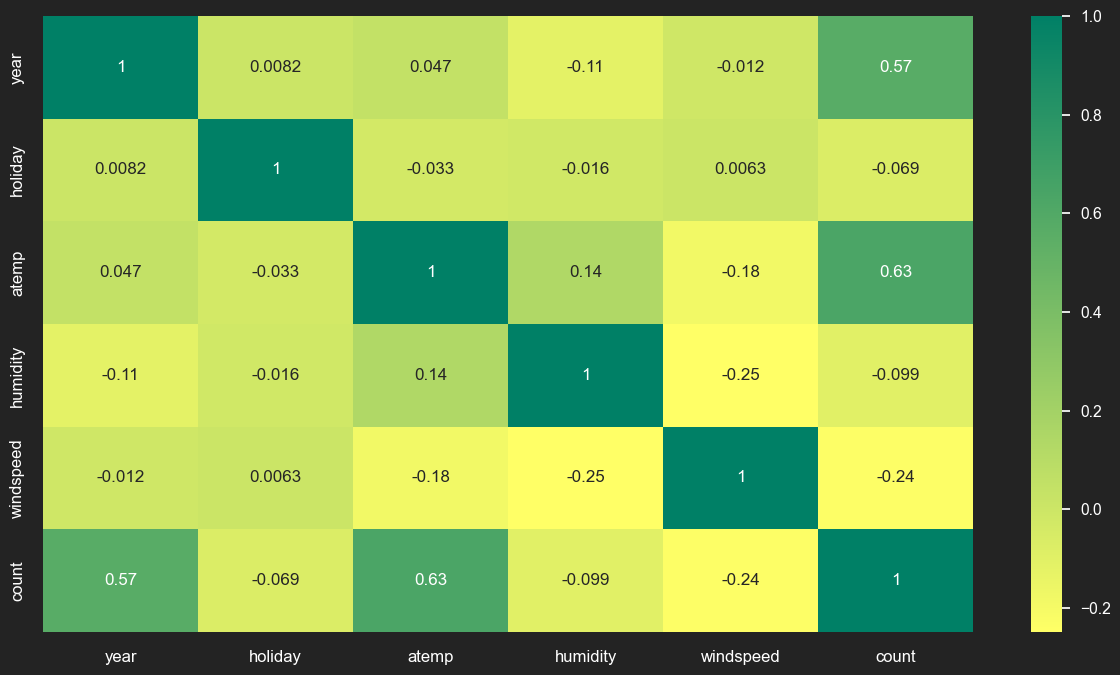

In [48]:
correlation(bdata1) #correlation between all variables

**Observation:**
In the above correlation plot,
1. <code>year</code> and <code>temp</code> are moderately correlated with <code>count</code>.
2. Hence, <code>count</code> is increading with the increase in <code>year</code>.
2. Hence, <code>atemp</code> is stable with the increase in <code>count</code>.


In [49]:
#exploring data
bdata1.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count,atemp_buckets,humidity_buckets,windspeed_buckets
0,spring,2018,jan,0,monday,holiday,mist,18.18,80.58,10.75,985,18.0-24.0,80.0+,6.0-12.0
1,spring,2018,jan,0,tuesday,holiday,mist,17.69,69.61,16.65,801,12.0-18.0,60.0-80.0,12.0-18.0
2,spring,2018,jan,0,wednesday,working_day,clear,9.47,43.73,16.64,1349,6.0-12.0,40.0-60.0,12.0-18.0
3,spring,2018,jan,0,thursday,working_day,clear,10.61,59.04,10.74,1562,6.0-12.0,40.0-60.0,6.0-12.0
4,spring,2018,jan,0,friday,working_day,clear,11.46,43.70,12.52,1600,6.0-12.0,40.0-60.0,12.0-18.0


# **Segmented Univariate Analysis**

In [50]:
#segmenting only the 2018 data
data_2018 = bdata1[bdata1.year == 2018]

#segmenting only the 2019 data
data_2019 = bdata1[bdata1.year == 2019]

In [51]:
#common function for plotting segmented univariate plots

def segmented(data, year):
    customPlot() #plot style
    
    plt.figure(figsize=(12, 5)) #plot figure size

    ax = sns.distplot(data['count'], color='mediumseagreen', bins=100) #distribution plot for 100 bins
    ax.set_xlabel('year') #xlabel
    ax.set_title('Segmented Year ' + str(year) + ' for Count Distribution') #title
    ax.grid(linestyle='--') #plot grid line customization

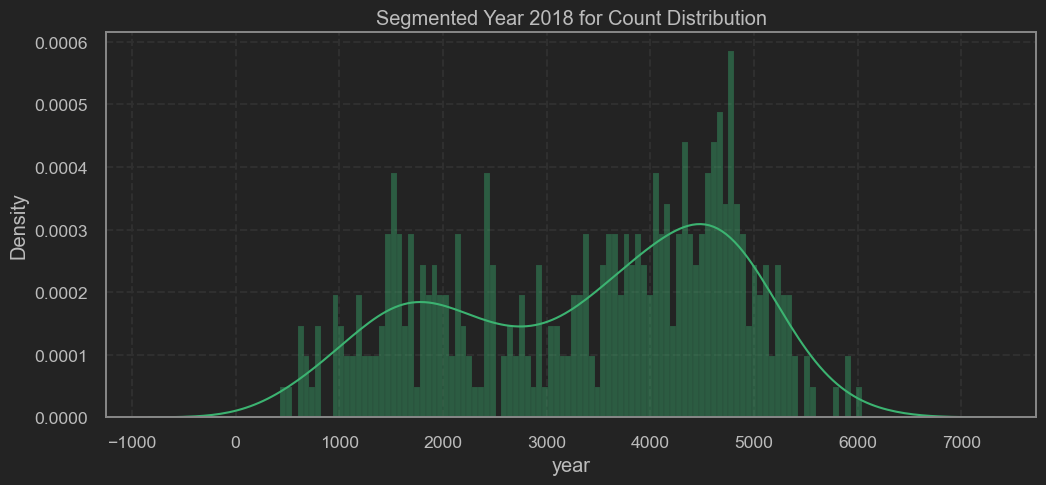

In [52]:
segmented(data_2018, 2018)

**Observation:**
In the above plot,
- <code>Count:</code> for most of the 2018 is almost equally distributed at low and high points.
- Hence, Lower the Year, Lower the Count.


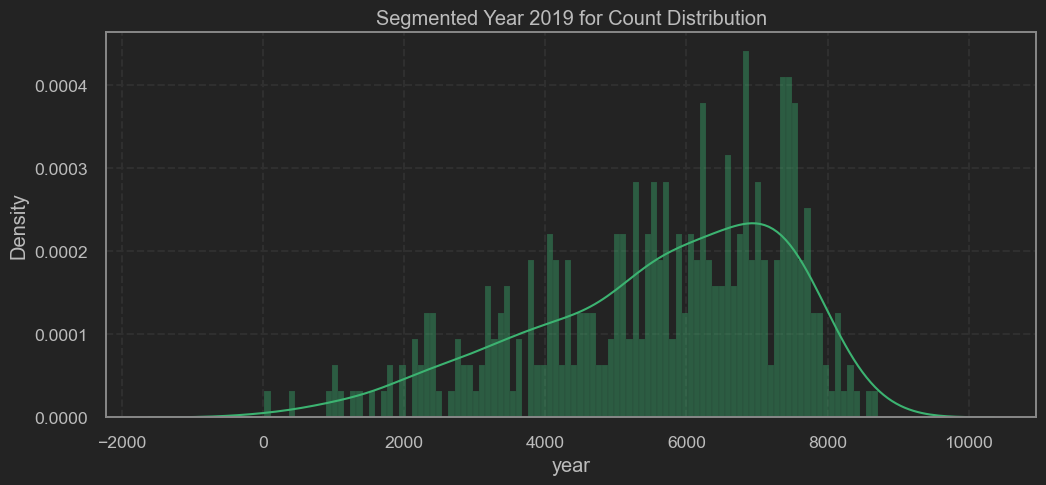

In [53]:
segmented(data_2019, 2019)

**Observation:**
In the above plot,
- <code>Count:</code> for most of the 2019 has highest distribution at high points.
- Hence, Higher the Year, Higher the Count.

# **Bivariate Analysis**

In [54]:
#common function for plotting the bivariate plots

def plot(columns, labels, hue=False, xticks_rotate=[]):
    customPlot() #plot style
    
    for i, v in enumerate(columns):
        x = v
        y = 'count'
        xlabel = labels[i]
        ylabel = 'Count'
        title = xlabel + ' vs ' + ylabel

        if(hue):    
            sns.barplot(ax=axes[i], x=x, y=y, hue='year', data=bdata1, palette='summer', linewidth=1)
        else:
            sns.barplot(ax=axes[i], x=x, y=y, data=bdata1, palette='summer', linewidth=1)

        axes[i].set_xlabel(xlabel)
        axes[i].set_ylabel(ylabel)
        axes[i].set_title(title, color='w', fontdict={'size': 20, 'weight': 'bold'})
        axes[i].grid(linestyle='--')

        if(i in xticks_rotate):
            plt.sca(axes[i])
            plt.xticks(rotation=90)
        
        fig = axes[i].get_figure()
        fig.tight_layout()
    

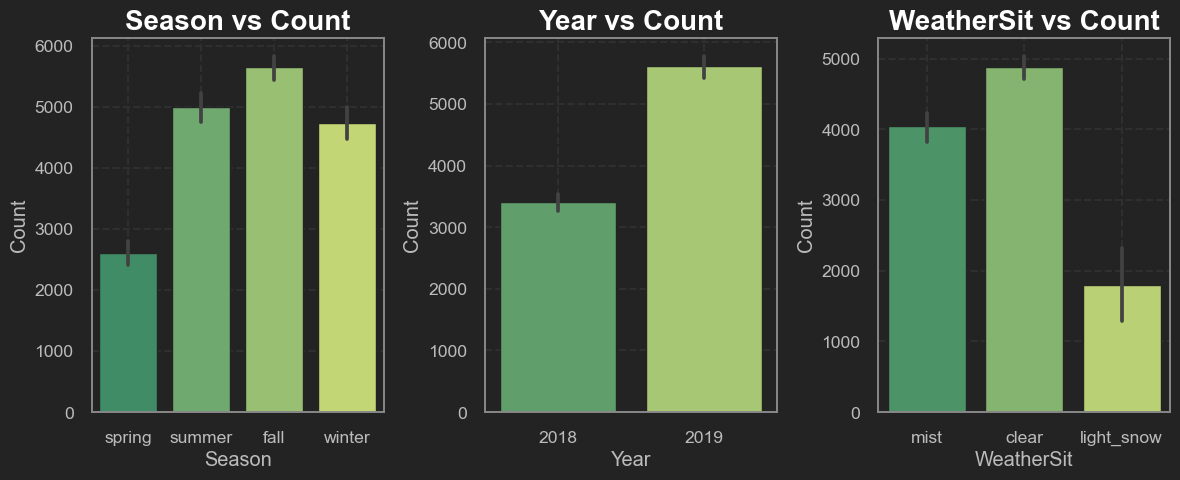

In [55]:
customPlot() #plot style

#columns and labels for subplots
columns = ['season', 'year', 'weathersit']
labels = ['Season', 'Year', 'WeatherSit']

#subplot configurations
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
plot(columns, labels)

**Observation:**
In the above plot,
- <code>Season:</code> Fall has the highest bike sharing count.
- <code>Year:</code> 2019 having more bike sharing count.
- <code>WeatherSit:</code> Clear has the highest bike sharing count.


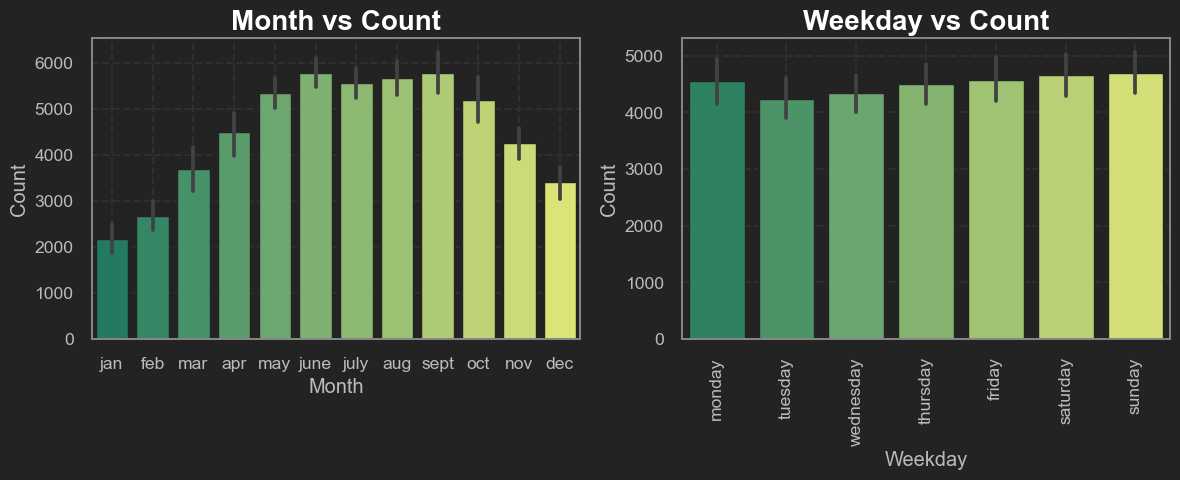

In [56]:
#columns and labels for subplots
columns = ['month', 'weekday']
labels = ['Month', 'Weekday']

#subplot configurations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot(columns, labels, xticks_rotate=[1])

**Observation:**
In the above plot,
- <code>Month:</code> June and September have highest count.
- <code>Weekday:</code> Monday and Sunday having more count.


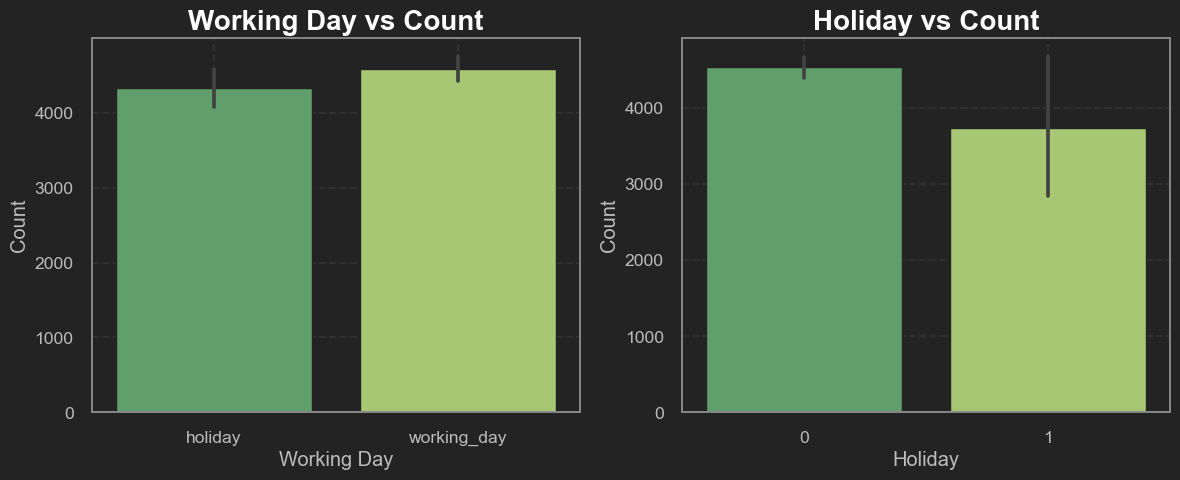

In [57]:
#columns and labels for subplots
columns = ['workingday', 'holiday']
labels = ['Working Day', 'Holiday']

#subplot configurations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot(columns, labels)

**Observation:**
In the above plot,
- <code>Working Day:</code> Working Day has the highest count.
- <code>Holiday:</code> 0 is Working Day that has the highest count.


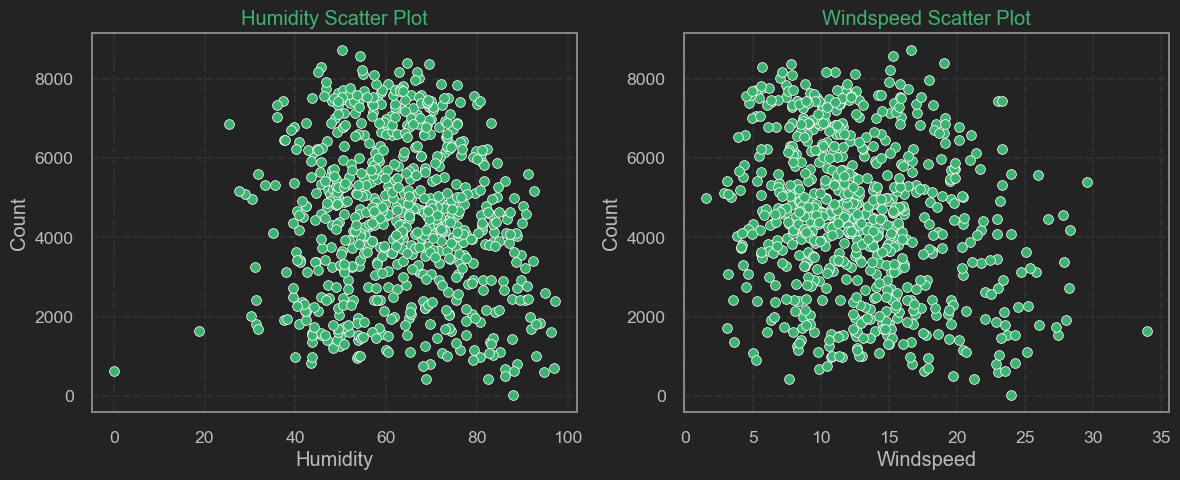

In [58]:
columns = ['humidity', 'windspeed'] #columns for subplot
labels = ['Humidity', 'Windspeed'] #labels for subplot

fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #initializing a subplot
scatterPlot(columns, 'count', labels, fig, axes) #scatter plot

**Observation:**
In the above plot,
- <code>Humidity:</code> 
    - Humidity is inversely proportional to Temperature. Humidity increases with decrese in Temperature.
    - Count is higher at high Humidity. Hence, Count is higher at Feeling Temperatures.
- <code>Windspeed:</code> Count is higher at less Windspeed.

# **Bivariate Analysis with Year as Hue**

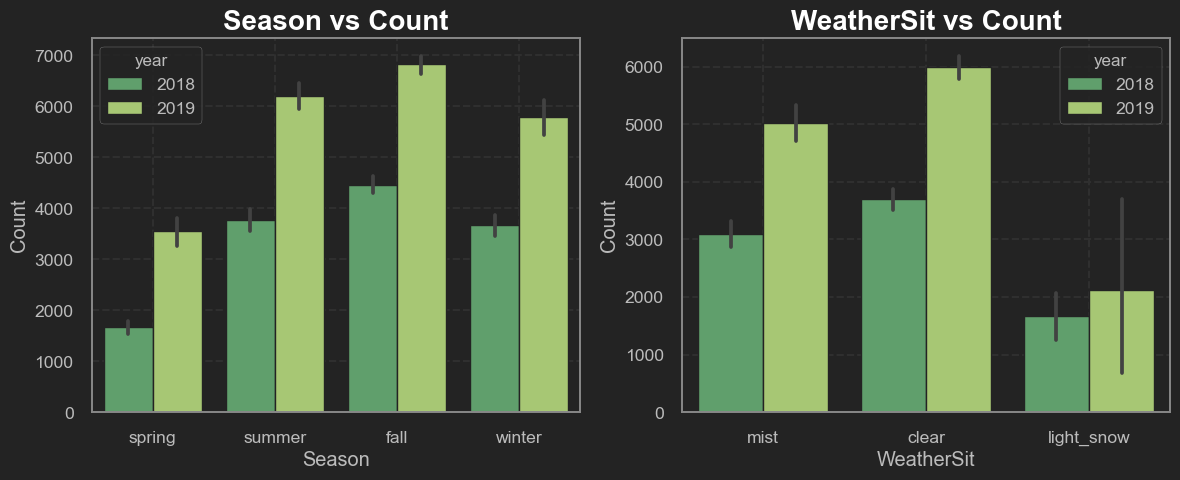

In [59]:
customPlot() #plot style

#columns and labels for subplots
columns = ['season', 'weathersit']
labels = ['Season', 'WeatherSit']

#subplot configurations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot(columns, labels, hue=True)

**Observation:**
In the above plot,
- <code>Season vs Count:</code> For every Season, Year 2019 has the highest Count.
- <code>Weathersit vs Count:</code> In every Weather, Year 2019 has the highest Count.

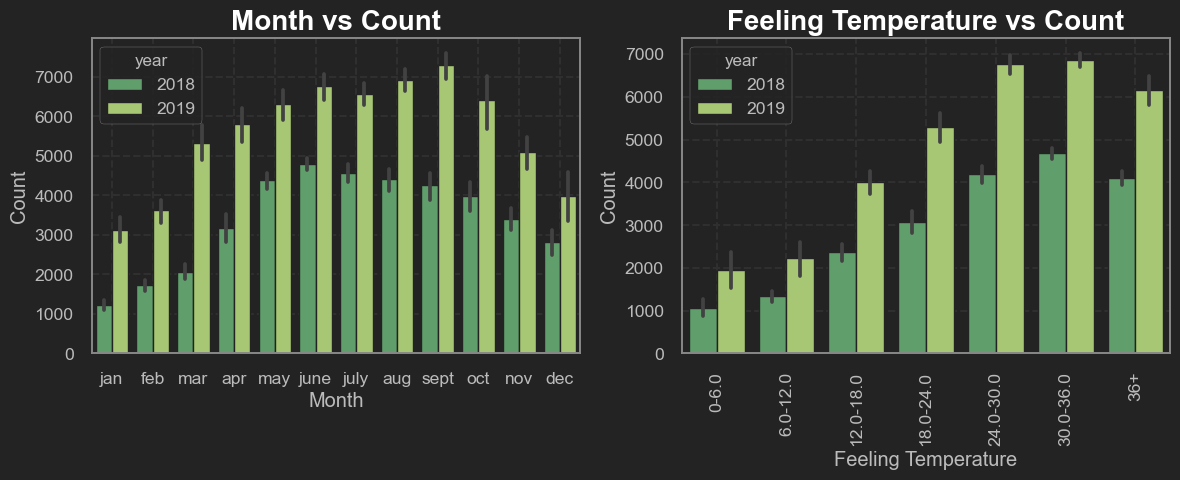

In [60]:
customPlot() #plot style

#columns and labels for subplots
columns = ['month', 'atemp_buckets']
labels = ['Month', 'Feeling Temperature']

#subplot configurations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot(columns, labels, hue=True, xticks_rotate=[1])

**Observation:**
In the above plot,
- <code>Month vs Count:</code> For every Month, Year 2019 has the highest Count.
- <code>Temperature vs Count:</code> 
    - In every Temperature, Year 2019 has the highest Count.
    - Hence, Count is high at high feeling temperatures.

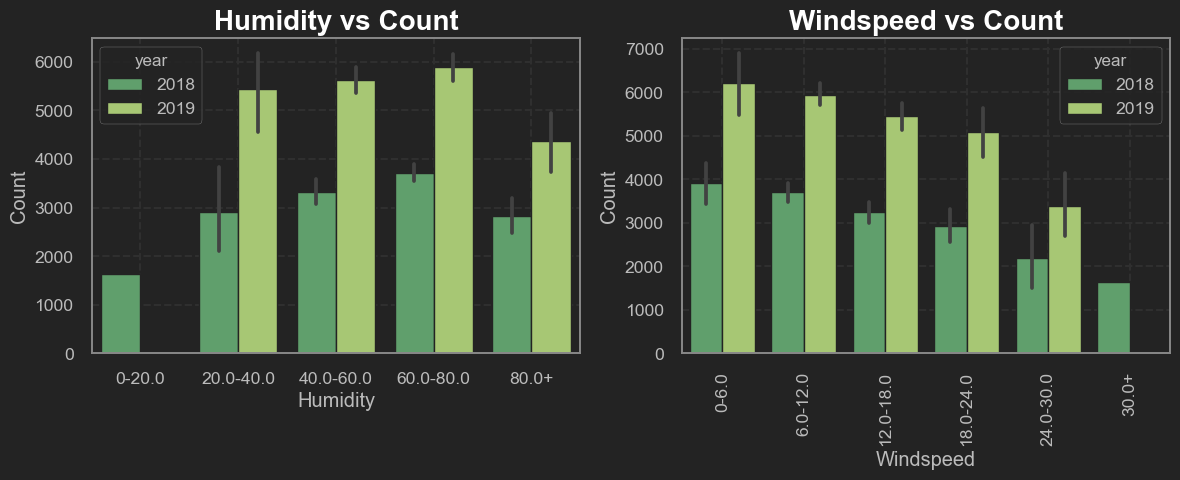

In [61]:
customPlot() #plot style

#columns and labels for subplots
columns = ['humidity_buckets', 'windspeed_buckets']
labels = ['Humidity', 'Windspeed']

#subplot configurations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot(columns, labels, hue=True, xticks_rotate=[1])

**Observation:**
In the above plot,
- <code>Humidity vs Count:</code> For every Humidity, Year 2019 has the highest Count.
- <code>Windspeed vs Count:</code> For every Windspeed, Year 2019 has the highest Count.

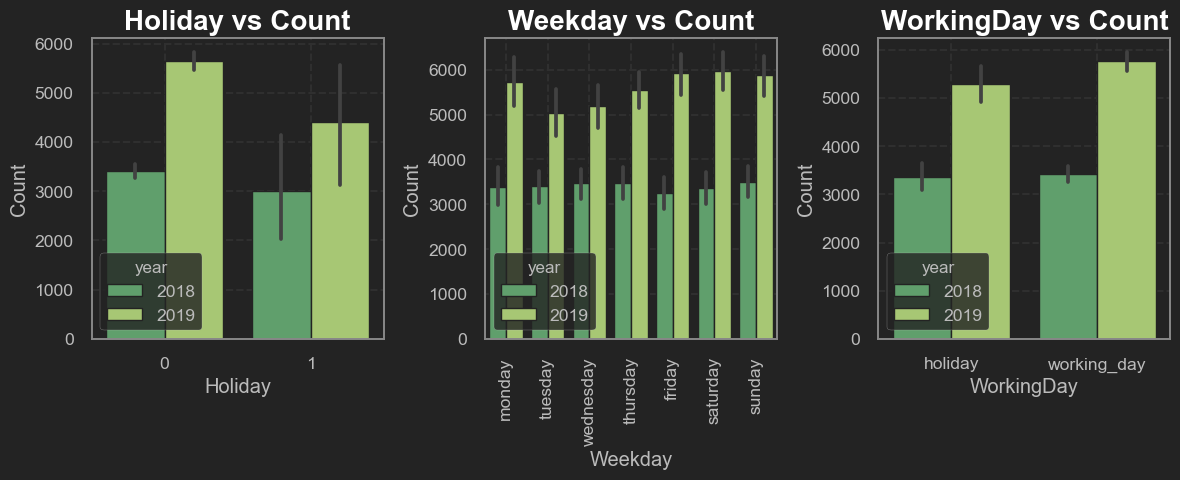

In [62]:
customPlot() #plot style

#columns and labels for subplots
columns = ['holiday', 'weekday', 'workingday']
labels = ['Holiday', 'Weekday', 'WorkingDay']

#subplot configurations
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
plot(columns, labels, hue=True, xticks_rotate=[1])

**Observation:**
In the above plot,
- <code>Holiday vs Count:</code> For every Holiday, Year 2019 has the highest Count.
- <code>Weekday vs Count:</code> For every Weekday, Year 2019 has the highest Count.
- <code>Workingday vs Count:</code> For every Workingday, Year 2019 has the highest Count.

In [63]:
#exploring data
bdata1.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count,atemp_buckets,humidity_buckets,windspeed_buckets
0,spring,2018,jan,0,monday,holiday,mist,18.18,80.58,10.75,985,18.0-24.0,80.0+,6.0-12.0
1,spring,2018,jan,0,tuesday,holiday,mist,17.69,69.61,16.65,801,12.0-18.0,60.0-80.0,12.0-18.0
2,spring,2018,jan,0,wednesday,working_day,clear,9.47,43.73,16.64,1349,6.0-12.0,40.0-60.0,12.0-18.0
3,spring,2018,jan,0,thursday,working_day,clear,10.61,59.04,10.74,1562,6.0-12.0,40.0-60.0,6.0-12.0
4,spring,2018,jan,0,friday,working_day,clear,11.46,43.70,12.52,1600,6.0-12.0,40.0-60.0,12.0-18.0


In [64]:
bdata2 = bdata1.iloc[:] #creating a copy of actual data

- **Binning columns are not suitable for Models**

In [65]:
#dropping binning columns
bdata2.drop(['atemp_buckets', 'humidity_buckets', 'windspeed_buckets'], 1, inplace=True)

#exploring data
bdata2.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count
0,spring,2018,jan,0,monday,holiday,mist,18.18,80.58,10.75,985
1,spring,2018,jan,0,tuesday,holiday,mist,17.69,69.61,16.65,801
2,spring,2018,jan,0,wednesday,working_day,clear,9.47,43.73,16.64,1349
3,spring,2018,jan,0,thursday,working_day,clear,10.61,59.04,10.74,1562
4,spring,2018,jan,0,friday,working_day,clear,11.46,43.70,12.52,1600


## Creating Dummy Variables

In [66]:
#categorical columns
cat_cols = ["season", "month", "weekday", "workingday", "weathersit"] 

#creating dummies for all categorical columns
bdata2 = pd.get_dummies(data=bdata2, columns=cat_cols, drop_first=True) 

#exploring data
bdata2.head()

,year,holiday,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_aug,...,month_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_working_day,weathersit_light_snow,weathersit_mist
0,2018,0,18.18,80.58,10.75,985,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2018,0,17.69,69.61,16.65,801,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2018,0,9.47,43.73,16.64,1349,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,2018,0,10.61,59.04,10.74,1562,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2018,0,11.46,43.70,12.52,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [67]:
#exploring columns after creating dummies
bdata2.columns

Index(['year', 'holiday', 'atemp', 'humidity', 'windspeed', 'count',
       'season_spring', 'season_summer', 'season_winter', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_july', 'month_june',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sept',
       'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday',
       'workingday_working_day', 'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')

- **Re-mapping <code>year</code> column with 0 and 1**

In [68]:
#re-mapping 2018 and 2019 to 0 and 1 respectively
bdata2.year = bdata2.year.map({
    2018: 0,
    2019: 1
})

## Splitting Train and Test Data

In [69]:
#splitting train and test data
df_train, df_test = train_test_split(bdata2, train_size=0.7, random_state=100)

In [70]:
#shape of train data (510 rows, 28 columns)
print('df_train shape:', df_train.shape)

#shape of test data (220 rows, 28 columns)
print('df_test shape:', df_test.shape)

#exploring train data
df_train.head()

df_train shape: (510, 29)
df_test shape: (220, 29)


,year,holiday,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_aug,...,month_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_working_day,weathersit_light_snow,weathersit_mist
576,1,0,33.14,70.42,11.08,7216,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
426,1,0,20.67,62.12,10.79,4066,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
728,1,0,11.59,48.33,23.50,1796,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
482,1,0,18.88,48.96,8.71,4220,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
111,0,0,16.10,72.96,14.71,1683,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1


## Scaling Numerical Variables

In [71]:
#numerical variables
numeric_variables = ['atemp', 'humidity', 'windspeed', 'count']

#scaling all numeric variables to 0 for min and 1 for max using minmaxscaler
scaler = MinMaxScaler() #using MinMaxScaler
df_train[numeric_variables] = scaler.fit_transform(df_train[numeric_variables]) #fitting train data
df_test[numeric_variables] = scaler.transform(df_test[numeric_variables]) #transforming test data

- **Splitting target variable from other variables**

In [72]:
y_train = df_train.pop('count') #assigning count column to y train variable
X_train = df_train #assigning all columns except count column to x train variable

In [73]:
#exploring x train data after removing count column
X_train.head()

,year,holiday,atemp,humidity,windspeed,season_spring,season_summer,season_winter,month_aug,month_dec,...,month_sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_working_day,weathersit_light_snow,weathersit_mist
576,1,0,0.77,0.73,0.26,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
426,1,0,0.44,0.64,0.26,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
728,1,0,0.20,0.50,0.66,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
482,1,0,0.39,0.50,0.19,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
111,0,0,0.32,0.75,0.38,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [74]:
#exploring y train data after assigning count column
y_train.head()

576   0.83
426   0.47
728   0.20
482   0.48
111   0.19
Name: count, dtype: float64

## Selecting features using RFE

- RFE (Recursive Feature Elimination) is and efficient approach for eliminating features from a training dataset for feature selection

In [75]:
#selecting features

train_estimator = LinearRegression() #creating a linear regression model for train dataset
test_estimator = LinearRegression() #creating a linear regression model for test dataset

train_estimator.fit(X_train, y_train) #fitting train dataset

selector = RFE(train_estimator, 17) #selecting 17 features
selector = selector.fit(X_train, y_train) #fitting train dataset after selecting features
selector

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

- **Exploring Features according to thier Ranking and Selection**

In [ ]:
all_features_df = pd.DataFrame({
    'Columns': X_train.columns, 'Selected': selector.support_, 'Ranking': selector.ranking_
})

all_features_df.sort_values(by=['Ranking'])


,Columns,Selected,Ranking
0,year,True,1
25,workingday_working_day,True,1
19,weekday_monday,True,1
18,month_sept,True,1
16,month_nov,True,1
15,month_may,True,1
26,weathersit_light_snow,True,1
11,month_jan,True,1
10,month_feb,True,1
27,weathersit_mist,True,1


- **Features that are not selected by RFE**

In [ ]:
X_train.columns[~selector.support_]

Index(['season_summer', 'month_aug', 'month_july', 'month_june', 'month_mar',
       'month_oct', 'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday'],
      dtype='object')

- **Features that are selected by RFE**

In [ ]:
features_selected = X_train.columns[selector.support_] #features selected
features_selected #exploring 17 selected features

Index(['year', 'holiday', 'atemp', 'humidity', 'windspeed', 'season_spring',
       'season_winter', 'month_dec', 'month_feb', 'month_jan', 'month_may',
       'month_nov', 'month_sept', 'weekday_monday', 'workingday_working_day',
       'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')

- **Filtering Selected X train features**

In [ ]:
selected_data = X_train[features_selected] #fetching selected features data from x train dataset
selected_data.head() #exploring selected features data from x train dataset

,year,holiday,atemp,humidity,windspeed,season_spring,season_winter,month_dec,month_feb,month_jan,month_may,month_nov,month_sept,weekday_monday,workingday_working_day,weathersit_light_snow,weathersit_mist
576,1,0,0.77,0.73,0.26,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.44,0.64,0.26,1,0,0,0,0,0,0,0,1,0,0,1
728,1,0,0.20,0.50,0.66,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0.39,0.50,0.19,0,0,0,0,0,0,0,0,1,0,0,1
111,0,0,0.32,0.75,0.38,0,0,0,0,0,0,0,0,0,1,0,1


# Build Model

In [ ]:
#common function to build the model
def modelBuilding(columns):
    X_train_sm = sm.add_constant(columns) #adding constant column to actual data

    lrm = sm.OLS(y_train, X_train_sm) #using OLS model with actual data
    lrm_model = lrm.fit() #fitting the model

    return lrm_model.summary() #summary of the model

#common function to get selected feature columns
def getSelectedFeatures(columns):
    return selected_data.loc[:, ~selected_data.columns.isin(columns)] #selected feature columns

#common function to calculate variance inflation factor
def calculateVIF(columns=['']):
    vif = pd.DataFrame() #creating a empty dataframe
    X = getSelectedFeatures(columns) #selected features dataset. column names will vary for every model

    vif['Features'] = X.columns #selected feature names

    #calculating VIF
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
    vif['VIF'] = round(vif['VIF'], 2)

    vif = vif.sort_values(by = "VIF", ascending = False) #sorting in descending order
    return vif #vif dataframe

# Model 1

- **Building with all features selected using RFE**

In [ ]:
modelBuilding(selected_data) #building model 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     157.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.11e-186
Time:                        22:20:44   Log-Likelihood:                 514.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     492   BIC:                            -916.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3415      0.034     10.114      0.000       0.275       0.408
year                       0.2350      0.008     29.063      0.000       0.219       0.251
holiday                   -0.0412      0.027     -1.503      0.134      -0.095       0.013
atemp                      0.3886      0.033     11.746      0.000       0.324       0.454
humidity                  -0.1405      0.038     -3.680      0.000      -0.216      -0.065
windspeed                 -0.1668      0.026     -6.458      0.000      -0.218      -0.116
season_spring             -0.0840      0.017     -4.814      0.000      -0.118      -0.050
season_winter              0.0778      0.014      5.401      0.000       0.049       0.106
month_dec                 -0.0634      0.018     -3.533      0.000      -0.099      -0.028
month_feb                 -0.0464      0.022     -2.157      0.032      -0.089      -0.004
month_jan                 -0.0820      0.021     -3.892      0.000      -0.123      -0.041
month_may                  0.0417      0.016      2.680      0.008       0.011       0.072
month_nov                 -0.0578      0.019     -3.091      0.002      -0.095      -0.021
month_sept                 0.0730      0.015      4.715      0.000       0.043       0.103
weekday_monday             0.0560      0.015      3.810      0.000       0.027       0.085
workingday_working_day     0.0461      0.012      3.958      0.000       0.023       0.069
weathersit_light_snow     -0.2589      0.027     -9.742      0.000      -0.311      -0.207
weathersit_mist           -0.0597      0.011     -5.677      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       92.603   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.590
Skew:                          -0.838   Prob(JB):                     4.81e-64
Kurtosis:                       6.303   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **Calculating VIF**

In [ ]:
calculateVIF() #calculate VIF for model 1

,Features,VIF
3,humidity,26.79
2,atemp,15.68
14,workingday_working_day,5.23
5,season_spring,4.27
4,windspeed,4.12
6,season_winter,3.11
9,month_jan,2.36
16,weathersit_mist,2.28
0,year,2.07
13,weekday_monday,1.96


# Model 2
- **<code>holiday</code> has p value > 0.05**
- **Removing <code>holiday</code> column as it has high p value**
- **Building model without <code>holiday</code>**

In [ ]:
#removing columns that are insignificant with p value > 0.05 and with high VIF
total_columns_removed_manually = ['holiday']

#model building 2
modelBuilding(getSelectedFeatures(total_columns_removed_manually))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     167.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.59e-187
Time:                        22:20:44   Log-Likelihood:                 513.30
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     493   BIC:                            -920.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3361      0.034      9.998      0.000       0.270       0.402
year                       0.2351      0.008     29.045      0.000       0.219       0.251
atemp                      0.3879      0.033     11.712      0.000       0.323       0.453
humidity                  -0.1398      0.038     -3.657      0.000      -0.215      -0.065
windspeed                 -0.1673      0.026     -6.469      0.000      -0.218      -0.116
season_spring             -0.0844      0.017     -4.831      0.000      -0.119      -0.050
season_winter              0.0781      0.014      5.418      0.000       0.050       0.106
month_dec                 -0.0643      0.018     -3.583      0.000      -0.100      -0.029
month_feb                 -0.0478      0.022     -2.219      0.027      -0.090      -0.005
month_jan                 -0.0832      0.021     -3.949      0.000      -0.125      -0.042
month_may                  0.0419      0.016      2.688      0.007       0.011       0.072
month_nov                 -0.0612      0.019     -3.289      0.001      -0.098      -0.025
month_sept                 0.0711      0.015      4.602      0.000       0.041       0.101
weekday_monday             0.0621      0.014      4.385      0.000       0.034       0.090
workingday_working_day     0.0522      0.011      4.761      0.000       0.031       0.074
weathersit_light_snow     -0.2585      0.027     -9.715      0.000      -0.311      -0.206
weathersit_mist           -0.0595      0.011     -5.654      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       97.719   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.813
Skew:                          -0.875   Prob(JB):                     1.60e-69
Kurtosis:                       6.441   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **Calculating VIF**

In [ ]:
calculateVIF(total_columns_removed_manually) #calculate VIF for model 2

,Features,VIF
2,humidity,26.69
1,atemp,15.58
13,workingday_working_day,4.66
4,season_spring,4.26
3,windspeed,4.10
5,season_winter,3.11
8,month_jan,2.35
15,weathersit_mist,2.27
0,year,2.07
7,month_feb,1.91


# Model 3
- **All variables have p value < 0.05**
- **Removing <code>humidity</code> column as it has high VIF**
- **Building model without <code>holiday</code> and <code>humidity</code>**

In [ ]:
#removing columns that are insignificant with p value > 0.05 and with high VIF
total_columns_removed_manually = ['holiday', 'humidity']

#model building 3
modelBuilding(getSelectedFeatures(total_columns_removed_manually))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.37e-185
Time:                        22:20:45   Log-Likelihood:                 506.48
No. Observations:                 510   AIC:                            -981.0
Df Residuals:                     494   BIC:                            -913.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2636      0.027      9.592      0.000       0.210       0.318
year                       0.2382      0.008     29.218      0.000       0.222       0.254
atemp                      0.3584      0.033     11.020      0.000       0.294       0.422
windspeed                 -0.1442      0.025     -5.681      0.000      -0.194      -0.094
season_spring             -0.0883      0.018     -5.004      0.000      -0.123      -0.054
season_winter              0.0680      0.014      4.746      0.000       0.040       0.096
month_dec                 -0.0698      0.018     -3.853      0.000      -0.105      -0.034
month_feb                 -0.0488      0.022     -2.237      0.026      -0.092      -0.006
month_jan                 -0.0884      0.021     -4.150      0.000      -0.130      -0.047
month_may                  0.0318      0.016      2.051      0.041       0.001       0.062
month_nov                 -0.0606      0.019     -3.218      0.001      -0.098      -0.024
month_sept                 0.0653      0.016      4.200      0.000       0.035       0.096
weekday_monday             0.0660      0.014      4.619      0.000       0.038       0.094
workingday_working_day     0.0546      0.011      4.935      0.000       0.033       0.076
weathersit_light_snow     -0.2979      0.025    -12.100      0.000      -0.346      -0.250
weathersit_mist           -0.0817      0.009     -9.381      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       97.605   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.149
Skew:                          -0.884   Prob(JB):                     2.01e-67
Kurtosis:                       6.365   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **Calculating VIF**

In [ ]:
calculateVIF(total_columns_removed_manually) #calculate VIF for model 3

,Features,VIF
1,atemp,5.69
12,workingday_working_day,4.56
2,windspeed,4.07
3,season_spring,3.86
4,season_winter,2.63
7,month_jan,2.21
0,year,2.06
6,month_feb,1.87
11,weekday_monday,1.82
9,month_nov,1.80


# Model 4
- **All variables have p value < 0.05**
- **Removing <code>workingday_working_day</code> column as it has high VIF and also correlate with weekday_monday**
- **Building model without <code>holiday</code>, <code>humidity</code> and <code>workingday_working_day</code>**

In [ ]:
#removing columns that are insignificant with p value > 0.05 and with high VIF
total_columns_removed_manually = ['holiday', 'humidity', 'workingday_working_day']

#model building 4
modelBuilding(getSelectedFeatures(total_columns_removed_manually))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     175.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.38e-181
Time:                        22:20:45   Log-Likelihood:                 494.21
No. Observations:                 510   AIC:                            -958.4
Df Residuals:                     495   BIC:                            -894.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3076      0.027     11.568      0.000       0.255       0.360
year                      0.2387      0.008     28.625      0.000       0.222       0.255
atemp                     0.3587      0.033     10.778      0.000       0.293       0.424
windspeed                -0.1459      0.026     -5.614      0.000      -0.197      -0.095
season_spring            -0.0894      0.018     -4.954      0.000      -0.125      -0.054
season_winter             0.0645      0.015      4.406      0.000       0.036       0.093
month_dec                -0.0688      0.019     -3.712      0.000      -0.105      -0.032
month_feb                -0.0521      0.022     -2.335      0.020      -0.096      -0.008
month_jan                -0.0894      0.022     -4.105      0.000      -0.132      -0.047
month_may                 0.0324      0.016      2.040      0.042       0.001       0.064
month_nov                -0.0628      0.019     -3.263      0.001      -0.101      -0.025
month_sept                0.0654      0.016      4.107      0.000       0.034       0.097
weekday_monday            0.0223      0.011      1.941      0.053      -0.000       0.045
weathersit_light_snow    -0.2904      0.025    -11.547      0.000      -0.340      -0.241
weathersit_mist          -0.0786      0.009     -8.851      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       99.337   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.294
Skew:                          -0.930   Prob(JB):                     6.79e-63
Kurtosis:                       6.164   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **Calculating VIF**

In [ ]:
calculateVIF(total_columns_removed_manually) #calculate VIF for model 4

,Features,VIF
1,atemp,3.97
2,windspeed,3.96
3,season_spring,3.78
4,season_winter,2.61
7,month_jan,2.19
0,year,2.06
6,month_feb,1.87
9,month_nov,1.80
5,month_dec,1.55
13,weathersit_mist,1.54


# Model 5
- **<code>weekday_monday</code> have p value > 0.05**
- **Removing <code>weekday_monday</code> column as it has high p value**
- **Building model without <code>holiday</code>, <code>humidity</code>, <code>workingday_working_day</code> and <code>weekday_monday</code>**

In [ ]:
#removing columns that are insignificant with p value > 0.05 and with high VIF
total_columns_removed_manually = ['holiday', 'humidity', 'workingday_working_day', 'weekday_monday']

#model building 5
modelBuilding(getSelectedFeatures(total_columns_removed_manually))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.41e-182
Time:                        22:20:45   Log-Likelihood:                 492.28
No. Observations:                 510   AIC:                            -956.6
Df Residuals:                     496   BIC:                            -897.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3114      0.027     11.708      0.000       0.259       0.364
year                      0.2382      0.008     28.499      0.000       0.222       0.255
atemp                     0.3575      0.033     10.713      0.000       0.292       0.423
windspeed                -0.1437      0.026     -5.519      0.000      -0.195      -0.093
season_spring            -0.0892      0.018     -4.926      0.000      -0.125      -0.054
season_winter             0.0647      0.015      4.408      0.000       0.036       0.094
month_dec                -0.0682      0.019     -3.670      0.000      -0.105      -0.032
month_feb                -0.0539      0.022     -2.411      0.016      -0.098      -0.010
month_jan                -0.0898      0.022     -4.110      0.000      -0.133      -0.047
month_may                 0.0310      0.016      1.947      0.052      -0.000       0.062
month_nov                -0.0639      0.019     -3.308      0.001      -0.102      -0.026
month_sept                0.0652      0.016      4.088      0.000       0.034       0.097
weathersit_light_snow    -0.2898      0.025    -11.491      0.000      -0.339      -0.240
weathersit_mist          -0.0785      0.009     -8.806      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       93.281   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.239
Skew:                          -0.864   Prob(JB):                     6.28e-61
Kurtosis:                       6.172   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **Calculating VIF**

In [ ]:
calculateVIF(total_columns_removed_manually) #calculate VIF for model 5

,Features,VIF
1,atemp,3.93
2,windspeed,3.92
3,season_spring,3.78
4,season_winter,2.60
7,month_jan,2.19
0,year,2.06
6,month_feb,1.87
9,month_nov,1.80
5,month_dec,1.55
12,weathersit_mist,1.54


# Model 6
- **<code>month_may</code> have p value > 0.05**
- **Removing <code>month_may</code> column as it has high p value**
- **Building model without <code>holiday</code>, <code>humidity</code>, <code>workingday_working_day</code>, <code>weekday_monday</code> and <code>month_may</code>**

In [ ]:
#removing columns that are insignificant with p value > 0.05 and with high VIF
total_columns_removed_manually = ['holiday', 'humidity', 'workingday_working_day', 'weekday_monday', 'month_may']

#model building 6
modelBuilding(getSelectedFeatures(total_columns_removed_manually))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.89e-182
Time:                        22:20:46   Log-Likelihood:                 490.34
No. Observations:                 510   AIC:                            -954.7
Df Residuals:                     497   BIC:                            -899.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3206      0.026     12.214      0.000       0.269       0.372
year                      0.2376      0.008     28.365      0.000       0.221       0.254
atemp                     0.3529      0.033     10.572      0.000       0.287       0.418
windspeed                -0.1456      0.026     -5.584      0.000      -0.197      -0.094
season_spring            -0.0956      0.018     -5.353      0.000      -0.131      -0.060
season_winter             0.0590      0.014      4.092      0.000       0.031       0.087
month_dec                -0.0697      0.019     -3.742      0.000      -0.106      -0.033
month_feb                -0.0548      0.022     -2.445      0.015      -0.099      -0.011
month_jan                -0.0914      0.022     -4.173      0.000      -0.134      -0.048
month_nov                -0.0651      0.019     -3.364      0.001      -0.103      -0.027
month_sept                0.0606      0.016      3.828      0.000       0.029       0.092
weathersit_light_snow    -0.2910      0.025    -11.513      0.000      -0.341      -0.241
weathersit_mist          -0.0770      0.009     -8.647      0.000      -0.094      -0.059
==============================================================================
Omnibus:                       91.991   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.129
Skew:                          -0.869   Prob(JB):                     3.26e-57
Kurtosis:                       6.037   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **Calculating VIF**

In [ ]:
calculateVIF(total_columns_removed_manually) #calculate VIF for model 6

,Features,VIF
2,windspeed,3.91
1,atemp,3.76
3,season_spring,3.73
4,season_winter,2.55
7,month_jan,2.18
0,year,2.06
6,month_feb,1.87
8,month_nov,1.80
5,month_dec,1.55
11,weathersit_mist,1.52


# Model 7
- **Reverting back <code>holiday</code> column as it correlates with both <code>workingday_working_day</code> and <code>weekday_monday</code>**
- **Building model without <code>humidity</code>, <code>workingday_working_day</code>, <code>weekday_monday</code> and <code>month_may</code>**

In [ ]:
#removing columns that are insignificant and with p value > 0.05
total_columns_removed_manually = ['humidity', 'workingday_working_day', 'weekday_monday', 'month_may']

#model building 7
modelBuilding(getSelectedFeatures(total_columns_removed_manually))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.33e-183
Time:                        22:20:46   Log-Likelihood:                 495.33
No. Observations:                 510   AIC:                            -962.7
Df Residuals:                     496   BIC:                            -903.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3205      0.026     12.318      0.000       0.269       0.372
year                      0.2373      0.008     28.574      0.000       0.221       0.254
holiday                  -0.0832      0.027     -3.132      0.002      -0.135      -0.031
atemp                     0.3541      0.033     10.703      0.000       0.289       0.419
windspeed                -0.1442      0.026     -5.579      0.000      -0.195      -0.093
season_spring            -0.0945      0.018     -5.338      0.000      -0.129      -0.060
season_winter             0.0591      0.014      4.131      0.000       0.031       0.087
month_dec                -0.0681      0.018     -3.689      0.000      -0.104      -0.032
month_feb                -0.0511      0.022     -2.297      0.022      -0.095      -0.007
month_jan                -0.0886      0.022     -4.080      0.000      -0.131      -0.046
month_nov                -0.0577      0.019     -2.986      0.003      -0.096      -0.020
month_sept                0.0644      0.016      4.093      0.000       0.033       0.095
weathersit_light_snow    -0.2939      0.025    -11.723      0.000      -0.343      -0.245
weathersit_mist          -0.0782      0.009     -8.858      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       82.263   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.838
Skew:                          -0.795   Prob(JB):                     1.11e-48
Kurtosis:                       5.804   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **Calculating VIF**

In [ ]:
calculateVIF(total_columns_removed_manually) #calculate VIF for model 7

,Features,VIF
3,windspeed,3.91
2,atemp,3.77
4,season_spring,3.73
5,season_winter,2.55
8,month_jan,2.19
0,year,2.06
7,month_feb,1.88
9,month_nov,1.83
6,month_dec,1.55
12,weathersit_mist,1.52


**Observation:**
In the above Model,
- Added <code>holiday</code> column.
- All variables have p value < 0.05.
- VIF for all variables is less than < 5

# Predicting Train Set
- **Filtering Train Dataset according to Model 7**

In [ ]:
#filtering columns for train dataset that are suitable for model 7
X_train_features_selected = X_train.loc[:, X_train.columns.isin(
    getSelectedFeatures(total_columns_removed_manually).columns
)]

#exploring x train data with significant variables
X_train_features_selected.head()

,year,holiday,atemp,windspeed,season_spring,season_winter,month_dec,month_feb,month_jan,month_nov,month_sept,weathersit_light_snow,weathersit_mist
576,1,0,0.77,0.26,0,0,0,0,0,0,0,0,0
426,1,0,0.44,0.26,1,0,0,0,0,0,0,0,1
728,1,0,0.20,0.66,1,0,1,0,0,0,0,0,0
482,1,0,0.39,0.19,0,0,0,0,0,0,0,0,1
111,0,0,0.32,0.38,0,0,0,0,0,0,0,0,1


- **Fitting Train Dataset according to Model 7**

In [ ]:
train_estimator.fit(X_train_features_selected, y_train) #fitting data with significant variables

print(train_estimator.intercept_) #intercept
print(train_estimator.coef_) #coefficient

0.3204702466024999
[ 0.23727936 -0.0831588   0.35414371 -0.1442498  -0.09449234  0.05908321
 -0.06811684 -0.0510847  -0.08861948 -0.05770619  0.06439692 -0.29394711
 -0.07824647]


**Observation:**
In the above Model,
- Added <code>holiday</code> column.
- All variables have p value < 0.05.
- VIF for all variables is < 5
- Intercept and Coefficients are same as the Stats model

- **Predicting Train Dataset for Model 7**

In [ ]:
#predicting train data with target variable
y_train_pred = train_estimator.predict(X_train_features_selected)

# No Multicollinearity

In [ ]:
calculateVIF(total_columns_removed_manually) #calculate VIF for model 7

,Features,VIF
3,windspeed,3.91
2,atemp,3.77
4,season_spring,3.73
5,season_winter,2.55
8,month_jan,2.19
0,year,2.06
7,month_feb,1.88
9,month_nov,1.83
6,month_dec,1.55
12,weathersit_mist,1.52


**Observation:**
In the above Model,
- All variables have values less than 5.
- Hence, No Multicollinearity observed.

# Residual Analysis
- **Distribution plot for Residual Analysis**

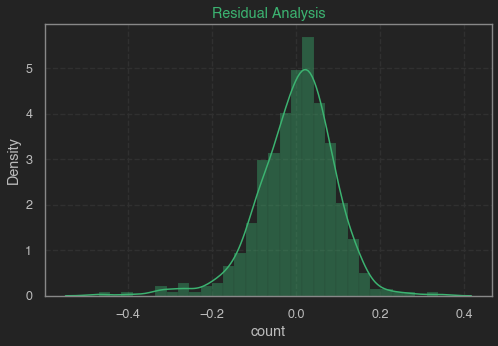

In [ ]:
residual = y_train - y_train_pred #residual

#plot style
customPlot()

plt.figure(figsize=(8, 5)) #plot figure size
ax = sns.distplot((residual), bins=30, color='mediumseagreen') #distribution plot
ax.set_title('Residual Analysis', color='mediumseagreen') #title
ax.grid(linestyle='--') #plot grid line customization

**Observation:**
In the above Residual Analysis,
- Residuals are Normally Distributed.


## Probability Plot of Residuals

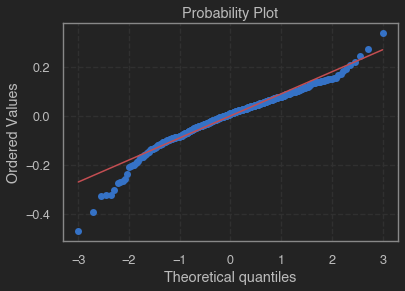

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

_, (__, ___, r) = stats.probplot(residual, plot=ax, fit=True)

ax.grid(linestyle='--') #plot grid line customization

**Observation:**
In the above Probability Residual Analysis,
- Residuals have linear relationship.


# Error Terms

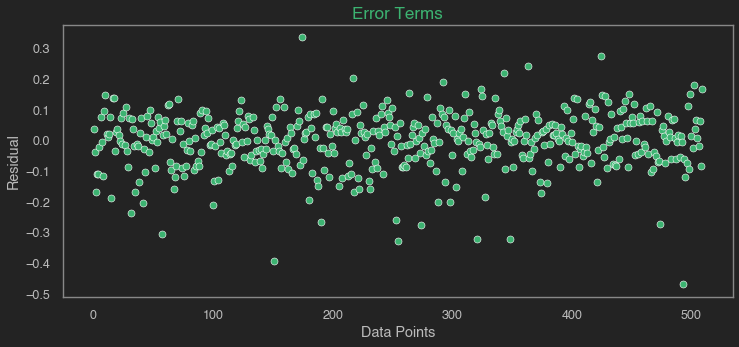

In [ ]:
plt.figure(figsize=(12, 5)) #plot figure size

data = [i for i in range(0,len(X_train_features_selected),1)] #points

sns.scatterplot(data, residual, color='mediumseagreen') #scatterplot
plt.title('Error Terms', fontsize = 17, color='mediumseagreen') #title
plt.xlabel('Data Points') #xlabel
plt.ylabel('Residual') #ylabel
plt.show()

**Observation:**
In the above Error Terms Analysis,
- There is no visible pattern between error terms.
- Hence, Error terms are Independent.


# Predicting Test Set
- **Splitting <code>count</code> column from other variables in Test Dataset**

In [ ]:
y_test = df_test.pop('count') #assigning count column to y test dataset
X_test = df_test #assigning all columns except count column to x test dataset

- **Filtering Test Dataset according to Model 7**

In [ ]:
#filtering columns for test dataset that are suitable for model 5
X_test_features_selected = X_test.loc[:, X_test.columns.isin(
    getSelectedFeatures(total_columns_removed_manually).columns
)]

#exploring x test data with significant variables
X_test_features_selected.head()

,year,holiday,atemp,windspeed,season_spring,season_winter,month_dec,month_feb,month_jan,month_nov,month_sept,weathersit_light_snow,weathersit_mist
184,0,1,0.77,0.08,0,0,0,0,0,0,0,0,1
535,1,0,0.84,0.15,0,0,0,0,0,0,0,0,0
299,0,0,0.50,0.33,0,1,0,0,0,0,0,0,1
221,0,0,0.80,0.34,0,0,0,0,0,0,0,0,0
152,0,0,0.74,0.54,0,0,0,0,0,0,0,0,0


- **Fitting and Predicting Test Dataset according to Model 7**

In [ ]:
test_estimator.fit(X_test_features_selected, y_test) #fitting train dataset

#predicting test data with target variable
y_test_pred = test_estimator.predict(X_test_features_selected)

# Model Evaluation

- **R-squared score on Train and Test set**

In [ ]:
#r2score for train dataset 
r2_train = r2_score(y_train, y_train_pred)
print('Train:', r2_train)

#r2score for test dataset
r2_test = r2_score(y_test, y_test_pred)
print('Test:', r2_test)

Train: 0.8330273773693526
Test: 0.8437199609927597


**Observation:**
In the above R-squared score,
1. Test score >= Train score.
2. Test score looks very good for predicted model.
3. Training and Testing score is nearly equal.
3. Hence, there is no Overfitting or Underfitting and the Model 7 is very significant.


In [ ]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred) #mean square error is low

0.00747241746652966

# Linearity
## Actual vs Predicted Data

In [ ]:
def plotit(actual_data, predicted_data, title, xlabel, ylabel, reg=True):
    #plot style
    customPlot()

    labels = ['Train Dataset', 'Test Dataset']

    fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #plot figure size

    #creating subplots
    for i, v in enumerate(actual_data):
        if reg:
            sns.regplot(ax=axes[i], x=v, y=predicted_data[i], color='mediumseagreen') #plotting reg plot
        else: 
            sns.scatterplot(ax=axes[i], x=v, y=predicted_data[i], color='mediumseagreen') #plotting reg plot
        axes[i].set_xlabel(xlabel) #xlabel
        axes[i].set_ylabel(ylabel) #xlabel
        axes[i].set_title(labels[i] + ' ' + title, color='mediumseagreen') #title
        axes[i].grid(linestyle='--') #plot grid customization
            
        fig = axes[i].get_figure() #plot figure
        fig.tight_layout() #to avoid overlap

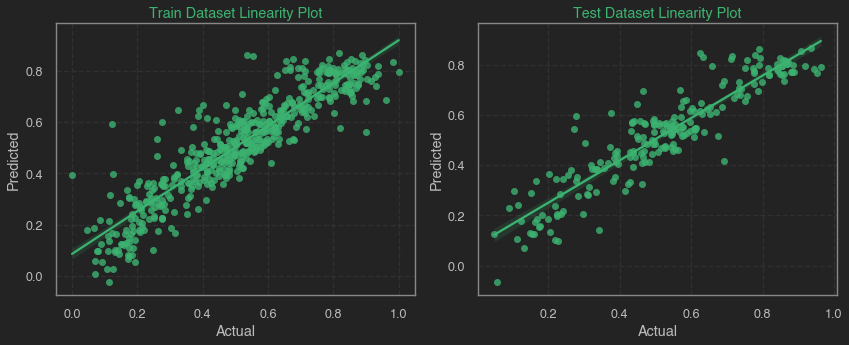

In [ ]:
actual_data = [y_train, y_test] #actual train and test data of target variable
predicted_data = [y_train_pred, y_test_pred] #predicted train and test data of target variable


title = 'Linearity Plot'
xlabel = 'Actual'
ylabel = 'Predicted'
plotit(actual_data, predicted_data, title, xlabel, ylabel, reg=True)

**Observation:**
In the above R-squared score,
- Predicted values have linearity with the Actual values.


## Homoscedasticity

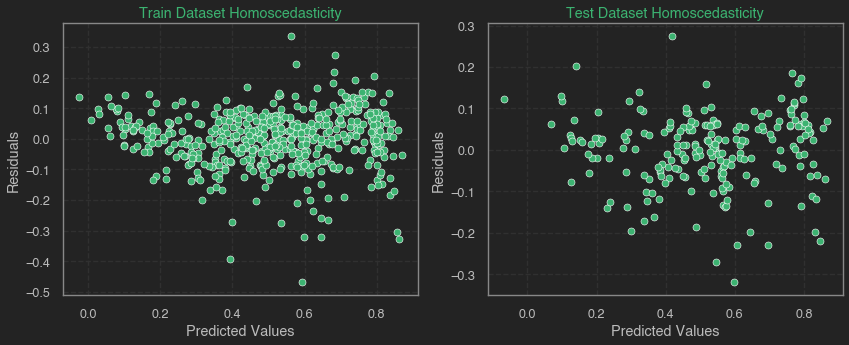

In [ ]:
predicted_data = [y_train_pred, y_test_pred] #predicted train and test data of target variable
residual_data = [y_train - y_train_pred, y_test - y_test_pred]

title = 'Homoscedasticity'
xlabel = 'Predicted Values'
ylabel = 'Residuals'
plotit(predicted_data, residual_data, title, xlabel, ylabel, reg=False)

## No Autocorrelation

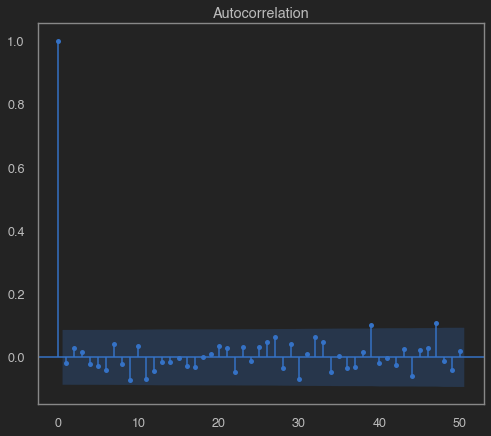

In [ ]:
ax = smt.graphics.plot_acf(residual, lags=50, alpha=0.05)
ax.show()

**Observation:**
In the above Auto-Correlation,
- There is almost No Autocorrelation of Residuals


## Actual vs Predicted Difference

- **There is a minute difference between Actual and Predicted values for Train Data**
- **Hence, Model 7 is a Significant Model**

In [ ]:
#difference of actual and predicted train data
y_train_pred_df = pd.DataFrame({
    'Actual Value': y_train, 'Predicted Value': y_train_pred, 'Difference': residual
})

print('Train Set:')
y_train_pred_df.head(5)

Train Set:


,Actual Value,Predicted Value,Difference
576,0.83,0.79,0.04
426,0.47,0.50,-0.04
728,0.20,0.37,-0.17
482,0.48,0.59,-0.11
111,0.19,0.30,-0.11


- **There is a minute difference between Actual and Predicted values for Test Data**
- **Hence, Model 7 is a Significant Model**

In [ ]:
#difference of actual and predicted test data
y_test_pred_df = pd.DataFrame({
    'Actual Value': y_test, 'Predicted Value': y_test_pred, 'Difference': y_test - y_test_pred
})

print('Test Set:')
y_test_pred_df.head()

Test Set:


,Actual Value,Predicted Value,Difference
184,0.69,0.42,0.28
535,0.71,0.82,-0.11
299,0.30,0.49,-0.19
221,0.55,0.55,-0.01
152,0.57,0.53,0.04


## Strong Indicators

In [ ]:
final_features = selected_data.loc[:, ~selected_data.columns.isin(
    total_columns_removed_manually
)]

pd.DataFrame({
    'Strong Variables': final_features.columns
})

,Strong Variables
0,year
1,holiday
2,atemp
3,windspeed
4,season_spring
5,season_winter
6,month_dec
7,month_feb
8,month_jan
9,month_nov


## Final Model

In [ ]:
modelBuilding(final_features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.33e-183
Time:                        20:14:22   Log-Likelihood:                 495.33
No. Observations:                 510   AIC:                            -962.7
Df Residuals:                     496   BIC:                            -903.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3205      0.026     12.318      0.000       0.269       0.372
year                      0.2373      0.008     28.574      0.000       0.221       0.254
holiday                  -0.0832      0.027     -3.132      0.002      -0.135      -0.031
atemp                     0.3541      0.033     10.703      0.000       0.289       0.419
windspeed                -0.1442      0.026     -5.579      0.000      -0.195      -0.093
season_spring            -0.0945      0.018     -5.338      0.000      -0.129      -0.060
season_winter             0.0591      0.014      4.131      0.000       0.031       0.087
month_dec                -0.0681      0.018     -3.689      0.000      -0.104      -0.032
month_feb                -0.0511      0.022     -2.297      0.022      -0.095      -0.007
month_jan                -0.0886      0.022     -4.080      0.000      -0.131      -0.046
month_nov                -0.0577      0.019     -2.986      0.003      -0.096      -0.020
month_sept                0.0644      0.016      4.093      0.000       0.033       0.095
weathersit_light_snow    -0.2939      0.025    -11.723      0.000      -0.343      -0.245
weathersit_mist          -0.0782      0.009     -8.858      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       82.263   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.838
Skew:                          -0.795   Prob(JB):                     1.11e-48
Kurtosis:                       5.804   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

## - Factors Affecting Demand
- ### BoomBikes needs to focus on the following factors that are strong indicators of Demand

    - **Year:** 2019 have highest demand than 2018. Hence, Demand got increased every year.
    - **Holiday:** Demand on holidays is high compared to working days.
    - **Feeling Temperatures:** Demand is high at feel like Temperatures.
    - **Windspeed:** Demand is high at low Windspeed.
    - **Season:** Spring and Winter have the highest demand.
    - **Month:** 
        - January, February, September, Novenmber and December months have highest demand. 
        - Hence, Starting and Ending of the Year have the highest demand.
    - **Weather:** At Light Snow and Mist have the highest demand.